In [1]:
from xenonnt_plot_style import XENONPlotStyle as xps
xps.use('xenonnt')

import numpy as np
import appletree as apt
from applefiles import aptext
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sps

import jax.numpy as jnp
import multihist as mh
from matplotlib.colors import LogNorm

from tqdm import tqdm
from appletree.utils import load_json, get_file_path
from GOFevaluation import BinnedPoissonChi2GOF, ADTestTwoSampleGOF

XLA_PYTHON_CLIENT_PREALLOCATE is set to false
XLA_PYTHON_CLIENT_ALLOCATOR is set to platform


OSError: [Errno 5] Input/output error

In [ ]:
apt.set_gpu_memory_usage(0.2)

In [ ]:
apt.clear_cache()
filename = '/home/ykaminaga/gamma_apt/sr1_rn220_fitting.h5'
context = apt.Context.from_backend(filename)
component = context.likelihoods['rn220_llh'].components['rn220_er']

In [2]:
parameters = context.get_post_parameters()
key = apt.get_key()
key, (cs1, cs2, eff) = component.simulate(key, int(2e6), parameters)
#mask = cs1 <= 100
#mask &= cs1 >= 0
#mask &= cs2 <= 1e4
#mask &= cs2 >= 1e2
#mask &= np.random.rand(len(cs1)) < eff

#reference_sample = np.array([cs1[mask], cs2[mask]])

NameError: name 'context' is not defined

In [22]:
mask = cs1 <= 100
mask &= cs1 >= 0
mask &= cs2 <= 1e4
mask &= cs2 >= 1e2
mask &= np.random.rand(len(cs1)) < eff
eff = eff[mask]

reference_sample = np.array([cs1[mask], cs2[mask]]).T

In [23]:
print(len(cs1[mask]), len(cs1))

1068249 2000000


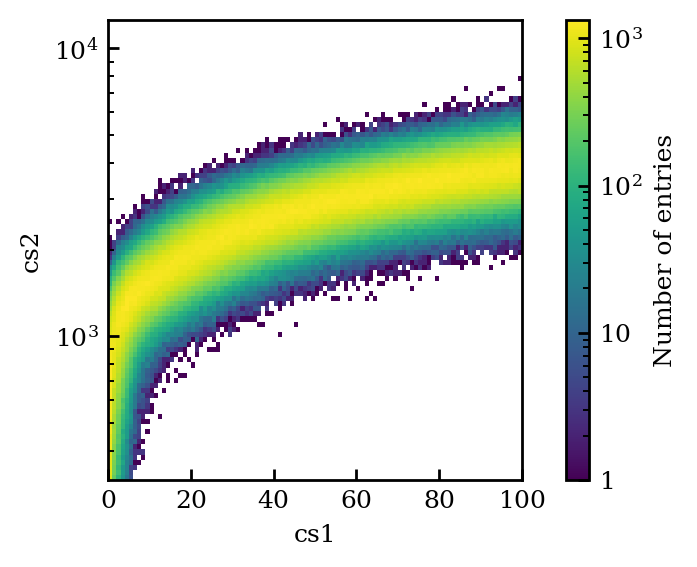

In [21]:
h_sr1, be = jnp.histogramdd(
    np.array([cs1, cs2]).T,
    bins=(jnp.linspace(0, 100, 101), jnp.logspace(2.5, 4.1, 91)),
    #weights=eff,
)

h_sr1 = mh.Histdd.from_histogram(np.array(h_sr1), be, axis_names=["cs1", "cs2"])
h_sr1.plot(norm=LogNorm())
plt.yscale("log")
plt.show()

In [13]:
print(parameters['rn220_ac_rate'] / parameters['rn220_er_rate'])

0.007726599185735658


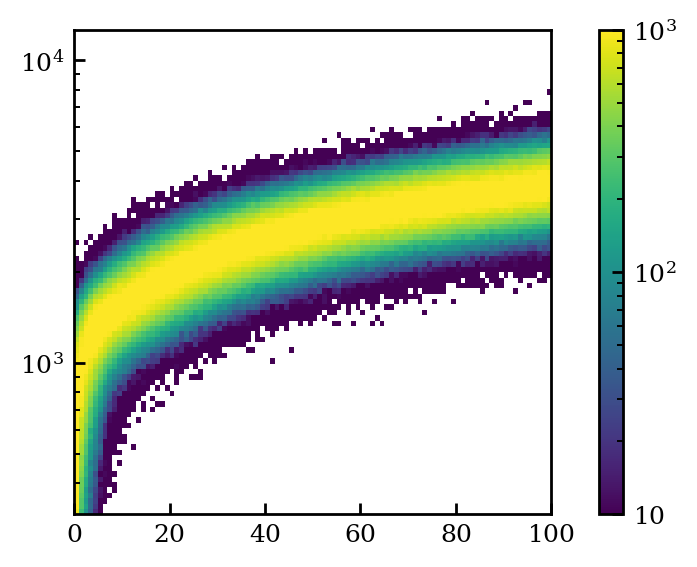

In [19]:
plt.hist2d(cs1, cs2, bins=(jnp.linspace(0, 100, 101), jnp.logspace(2.5, 4.1, 91)), norm=LogNorm(vmin=10,vmax=1000))
plt.colorbar()
plt.yscale("log");